# Objetivo

<span style="color: black; font-family: Arial; font-size: 20px;">
Analisar o mercado de restaurantes em Los Angeles utilizando dados de código aberto, a fim de identificar tendências, concorrência e oportunidades de crescimento, com o objetivo de avaliar a viabilidade e a sustentabilidade em se abrir uma nova cafeteria.

# Preparando os dados

In [295]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import pandas as pd
from math import factorial
from plotly import graph_objects as go
import math
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [296]:
# Carregando o dataframe Datasets
rest_data = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\benchmarking-cafeteria-analysis\rest_data_us_upd.csv")
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [297]:
# Verificando e tratando valores duplicados
print(rest_data.duplicated().sum())

0


In [298]:
# Verificando e tratando valores ausentes
print(rest_data.isna().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [299]:
rest_data['chain'].unique()

array([False, True, nan], dtype=object)

<span style="color: black; font-family: Arial; font-size: 20px;">
Como os valores ausentes da coluna 'chain' já estão como Nan, não há necessidade de tratar esses valores.

# Análise de dados

<span style="color: blue; font-family: Arial; font-size: 20px;">
Investigando as proporções de vários tipos de estabelecimentos.

In [303]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [304]:
# Verificando os tipos de estabelecimentos
rest_data['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [305]:
# Contando estabelecimentos por tipo
counts_by_type = rest_data['object_type'].value_counts().reset_index()
counts_by_type.columns = ['object_type', 'count']
counts_by_type

,object_type,count
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [306]:
# Calculando o total de estabelecimentos
total_establishments = counts_by_type['count'].sum()
total_establishments

9651

In [307]:
# Adicionando a proporção
counts_by_type['proportion'] = counts_by_type['count'] / total_establishments
counts_by_type = counts_by_type.sort_values(by='proportion', ascending=False)
counts_by_type

,object_type,count,proportion
0,Restaurant,7255,0.751736
1,Fast Food,1066,0.110455
2,Cafe,435,0.045073
3,Pizza,320,0.033157
4,Bar,292,0.030256
5,Bakery,283,0.029323


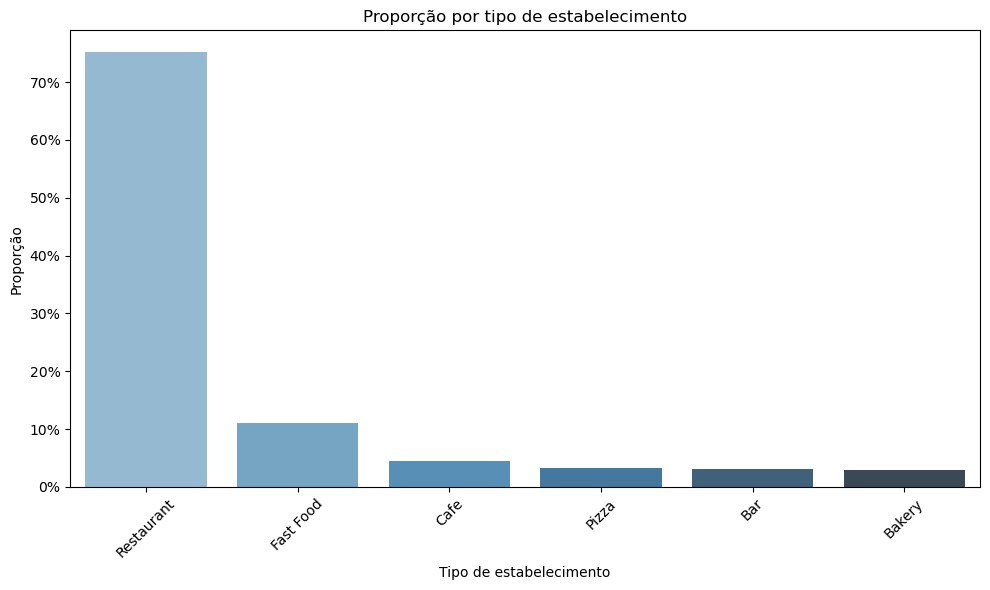

In [308]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_by_type, x='object_type', y='proportion', hue='object_type', palette='Blues_d')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proporção por tipo de estabelecimento')
plt.xlabel('Tipo de estabelecimento')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

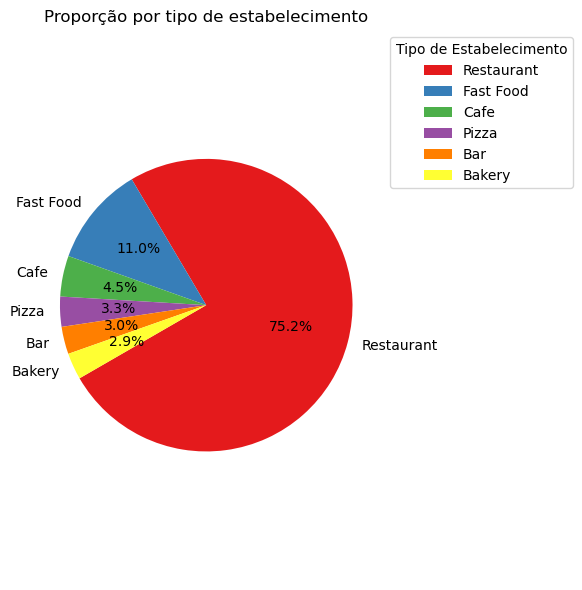

In [309]:
# Plotando um gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    counts_by_type['proportion'],
    labels=counts_by_type['object_type'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('Set1').colors,
    startangle=210
)

plt.title('Proporção por tipo de estabelecimento')
plt.axis('equal')  # Mantém o gráfico em círculo
plt.legend(title="Tipo de Estabelecimento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
“Restaurant” representa mais de 70% de todos os estabelecimentos.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Investigando as proporções de estabelecimentos que são de rede e que não são.

In [312]:
# Contando esbelecimentos de rede e sem rede.
chain_counts = rest_data['chain'].value_counts().reset_index()
chain_counts.columns = ['chain', 'count']
chain_counts

,chain,count
0,False,5972
1,True,3676


In [313]:
# Calculando o total de esbelecimentos de rede e sem rede.
total_chain = chain_counts['count'].sum()
total_chain

9648

In [314]:
# Calculando a proporção
total_chain = chain_counts['count'].sum()
chain_counts['proportion'] = chain_counts['count'] / total_chain
chain_counts

,chain,count,proportion
0,False,5972,0.618988
1,True,3676,0.381012


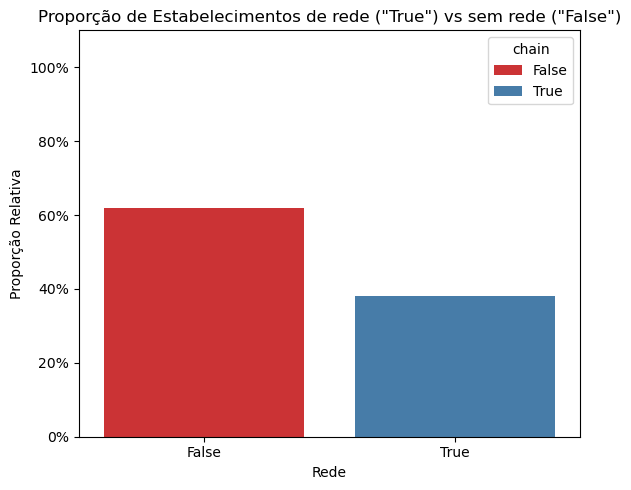

In [315]:
# Plotando um gráfico de barras
plt.figure(figsize=(6, 5))
sns.barplot(data=chain_counts, x='chain', y='proportion', hue= 'chain', palette='Set1')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proporção de Estabelecimentos de rede ("True") vs sem rede ("False")')
plt.xlabel('Rede')
plt.ylabel('Proporção Relativa')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

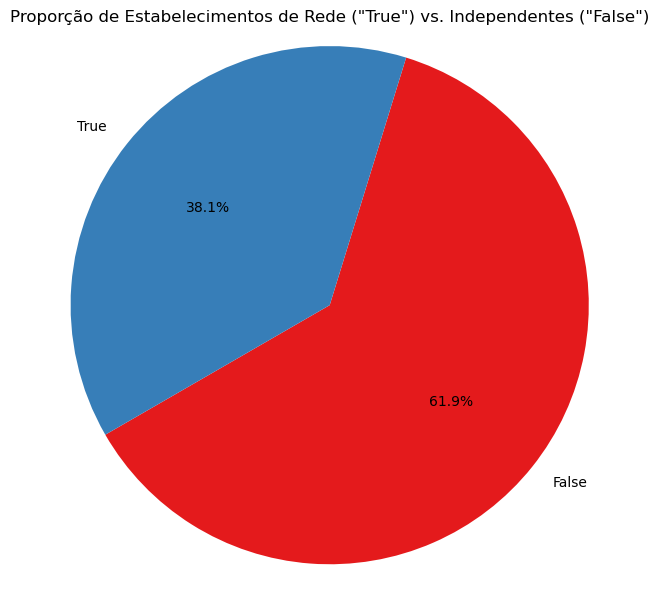

In [316]:
# Plotando um gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    chain_counts['proportion'],
    labels=chain_counts['chain'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('Set1').colors,
    startangle=210
)

plt.title('Proporção de Estabelecimentos de Rede ("True") vs. Independentes ("False")')
plt.axis('equal')
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
61.9% dos estabelecimentos não fazem parte de uma rede, enquanto 38.1% fazem parte de uma rede.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando qual tipo de estabelecimento é típico em ser de rede.

In [319]:
# Contando estabelecimentos por tipo e se são ou não parte de uma rede
chain_by_type = rest_data.groupby(['object_type', 'chain']).size().reset_index(name='count')
chain_by_type

,object_type,chain,count
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,166
8,Pizza,True,153
9,Restaurant,False,4961


In [320]:
# Calculando o total por tipo
chain_by_type['total'] = chain_by_type.groupby('object_type')['count'].transform('sum')
chain_by_type

,object_type,chain,count,total
0,Bakery,True,283,283
1,Bar,False,215,292
2,Bar,True,77,292
3,Cafe,False,169,435
4,Cafe,True,266,435
5,Fast Food,False,461,1066
6,Fast Food,True,605,1066
7,Pizza,False,166,319
8,Pizza,True,153,319
9,Restaurant,False,4961,7253


In [321]:
# Calculando a proporção relativa por tipo (dentro de cada object_type)
chain_by_type['proportion'] = chain_by_type['count'] / chain_by_type['total']
chain_by_type

,object_type,chain,count,total,proportion
0,Bakery,True,283,283,1.000000
1,Bar,False,215,292,0.736301
2,Bar,True,77,292,0.263699
3,Cafe,False,169,435,0.388506
4,Cafe,True,266,435,0.611494
5,Fast Food,False,461,1066,0.432458
6,Fast Food,True,605,1066,0.567542
7,Pizza,False,166,319,0.520376
8,Pizza,True,153,319,0.479624
9,Restaurant,False,4961,7253,0.683993


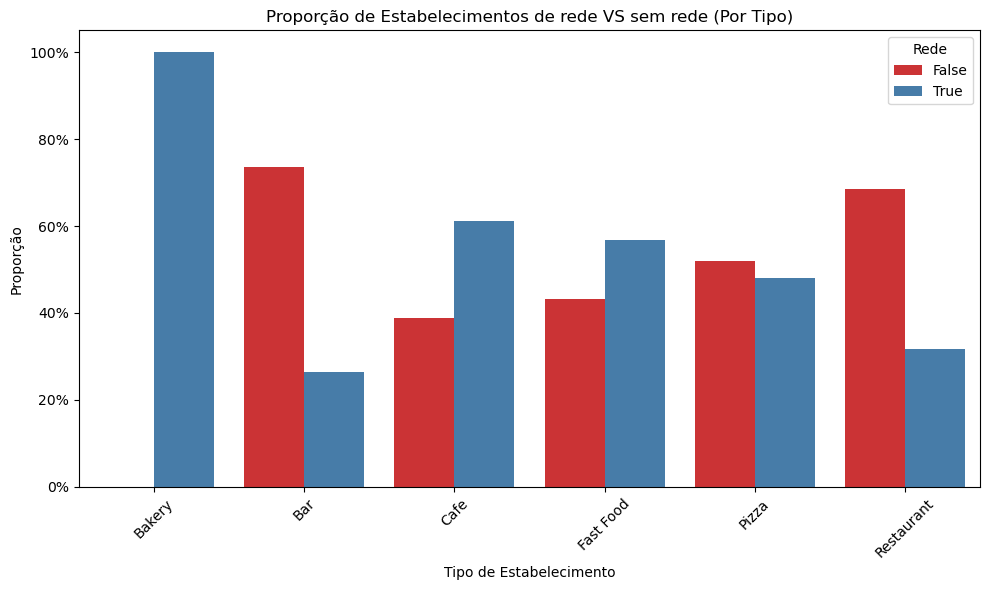

In [322]:
# Plotando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=chain_by_type,
    x='object_type',
    y='proportion',
    hue='chain',
    palette='Set1'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proporção de Estabelecimentos de rede VS sem rede (Por Tipo)')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Rede')
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
O estabelecimento mais típico para ser de rede é 'Bakery', sendo que ele também não tem estabelecimentos sem ser de rede.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Determinando o número médio de assentos para cada tipo de restaurante.

In [325]:
# Calculando a média de assentos por tipo de estabelecimento
mean_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
mean_seats_by_type

,object_type,number
0,Restaurant,48.042316
1,Bar,44.767123
2,Fast Food,31.837711
3,Pizza,28.459375
4,Cafe,25.000000
5,Bakery,21.773852


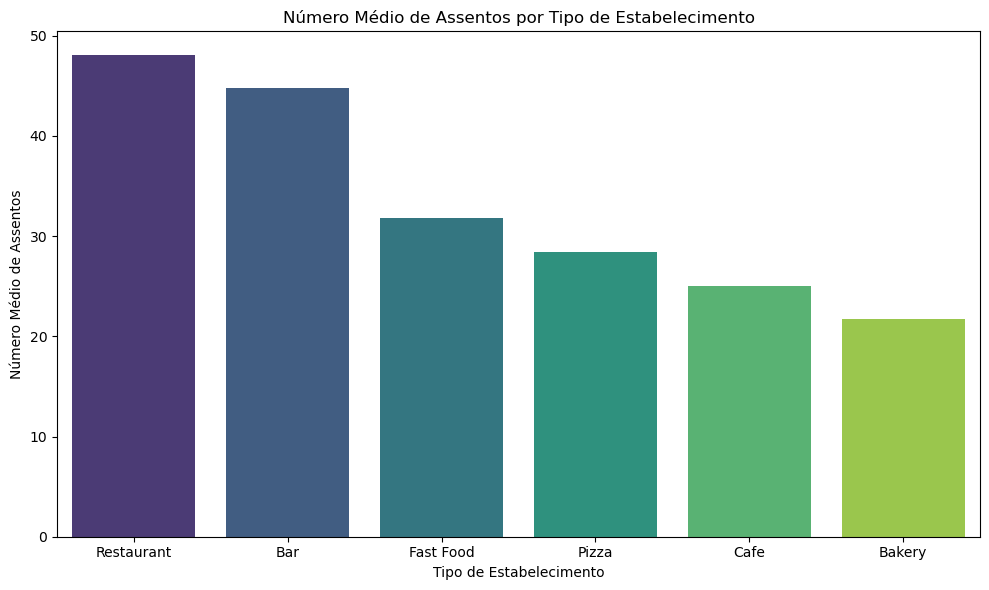

In [326]:
# Plotando gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_seats_by_type, x='object_type', y='number', hue='object_type', palette='viridis')
plt.title('Número Médio de Assentos por Tipo de Estabelecimento')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Número Médio de Assentos')
plt.tight_layout()
plt.show()

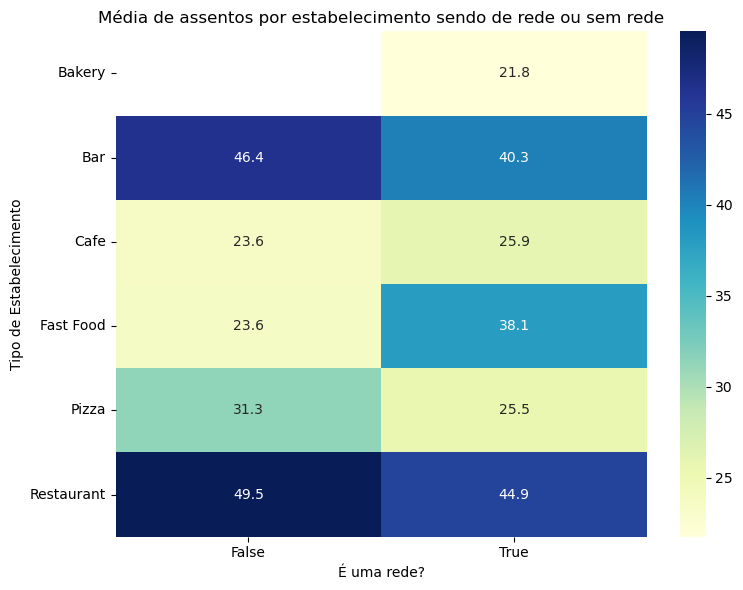

In [327]:
# Construindo um heatmap
heatmap_data = rest_data.pivot_table(
    values='number',
    index='object_type',
    columns='chain',
    aggfunc='mean'
)

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')

plt.title('Média de assentos por estabelecimento sendo de rede ou sem rede')
plt.xlabel('É uma rede?')
plt.ylabel('Tipo de Estabelecimento')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
O tipo 'Restaurant' tem o maior número médio de assentos, tanto os que são de rede quanto os que não são.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Colocando os dados dos nomes das ruas da coluna 'address' em uma coluna separada.

In [330]:
rest_data['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY 120',
       '6801 HOLLYWOOD BLVD 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [331]:
rest_data['address'].nunique()

8512

In [332]:
# Removendo o número do começo de cada string
rest_data['street_name'] = rest_data["address"].str.replace(r"^\d+\s+", "", regex=True)
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


<span style="color: blue; font-family: Arial; font-size: 20px;">
Construindo um gráfico de dez ruas com o maior número de restaurantes.

In [334]:
top_streets = rest_data["street_name"].value_counts().head(10)
top_streets

street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: count, dtype: int64

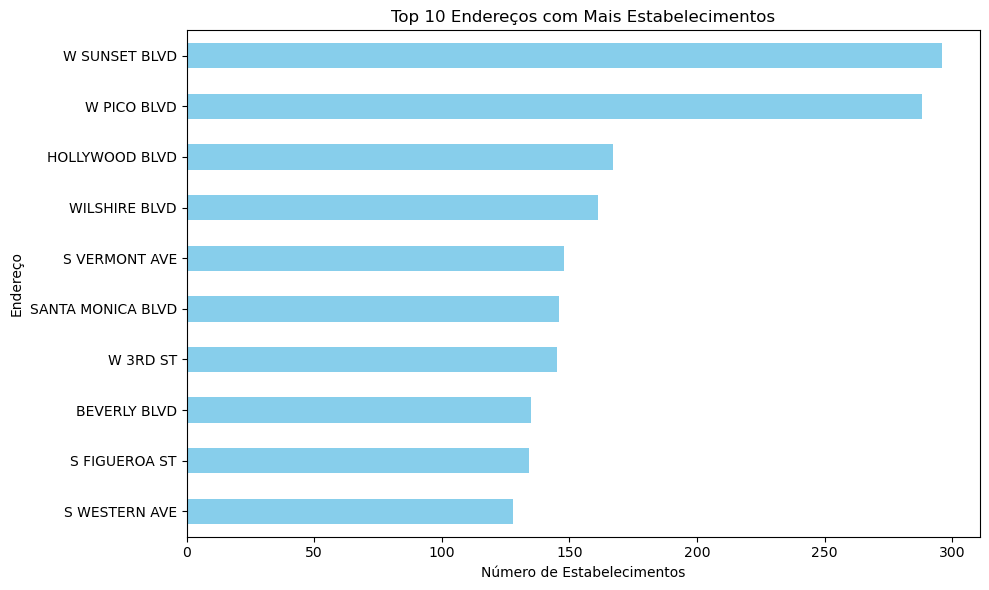

In [335]:
plt.figure(figsize=(10, 6))
top_streets.plot(kind='barh', color='skyblue')
plt.xlabel("Número de Estabelecimentos")
plt.ylabel("Endereço")
plt.title("Top 10 Endereços com Mais Estabelecimentos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
As ruas ‘W Sunset Blvd’ e ‘W Pico Blvd’ são as que mais tem restaurantes.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Encontrando o número de ruas que têm apenas um restaurante.

In [338]:
street_counts = rest_data["street_name"].value_counts()
street_counts.head()

street_name
W SUNSET BLVD     296
W PICO BLVD       288
HOLLYWOOD BLVD    167
WILSHIRE BLVD     161
S VERMONT AVE     148
Name: count, dtype: int64

In [339]:
unique_street_count = (street_counts == 1).sum()
print("Número de ruas com apenas um restaurante:", unique_street_count)

Número de ruas com apenas um restaurante: 2450


<span style="color: black; font-family: Arial; font-size: 20px;">
Há 2450 ruas com apenas um restaurante.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Analisando a relação de ruas com muitos restaurantes com a distribuição do número de assentos.

<span style="color: black; font-family: Arial; font-size: 20px;">
Quanto mais restaurantes em uma rua, há mais quantidade de assentos de modo geral.

In [343]:
# Selecionando as 10 ruas com mais restaurantes
top_streets = rest_data['street_name'].value_counts().head(10).index

In [344]:
# Filtrando os dados para conter apenas restaurantes dessas ruas
top_streets_data = rest_data[rest_data['street_name'].isin(top_streets)]

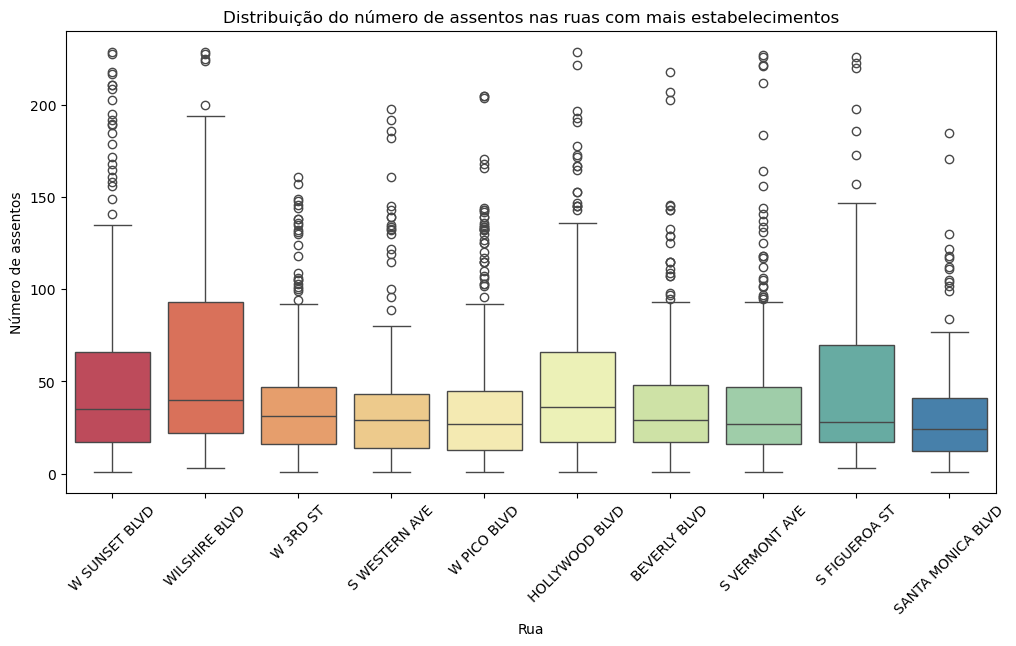

In [345]:
# Criando um boxplot para visualizar a distribuição de assentos
plt.figure(figsize=(12,6))
sns.boxplot(
    x='street_name',
    y='number',
    data=top_streets_data,
    hue='street_name',        
    palette='Spectral',           
    dodge=False               
)

plt.title('Distribuição do número de assentos nas ruas com mais estabelecimentos')
plt.xlabel('Rua')
plt.ylabel('Número de assentos')
plt.xticks(rotation=45)
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
A rua 'Wilshire BLDV' é a rua que tem o maior número de assentos e também a maior média de assentos.

# Conclusões e recomendações

<span style="color: black; font-family: Arial; font-size: 20px;">

- O mercado de Los Angeles é dominado por estabelecimentos do tipo **'Restaurant'** (mais de **70%** dos estabelecimentos).

- **A maioria dos negócios é independente** (61,9%), mas redes também têm presença forte (38,1%).

- **'Bakery'** é um segmento praticamente exclusivo de redes.

- O tipo **'Restaurant'** apresenta o **maior número médio de assentos**, tanto em redes quanto em estabelecimentos independentes.

- As ruas **W Sunset Blvd** e **W Pico Blvd** concentram muitos restaurantes, indicando alta concorrência.

- Existem **2450 ruas** com apenas um restaurante, sinalizando oportunidades em locais menos saturados.

- **A Wilshire Blvd** é um polo de grande porte, com o maior número absoluto e a maior média de assentos.

Recomendações

- Evitar polos superconcentrados (como W Sunset Blvd e W Pico Blvd).

- Priorizar ruas com baixa concorrência, mas próximas a áreas de alto fluxo, explorando oportunidades entre as 2450 ruas com apenas um ou poucos restaurantes.

- Considerar a região da **Wilshire Blvd** como estratégica pelo perfil de consumo e infraestrutura.

- Desenvolver uma estratégia de longo prazo, com foco em fidelização e posicionamento, garantindo sustentabilidade do negócio.